<a href="https://colab.research.google.com/github/DataBoyD/modeling_labs/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Задание №1**

In [50]:
k = 40 # емкость среды
r = .05 # относительный темп прироста
t_0 = 0
N_0 = 5
t = np.arange(0, 120, 0.1)

N_free = N_0 * np.exp(r * (t - t_0))
N_limited = k * N_0 * np.exp(r * (t - t_0)) / (k + N_0 * (np.exp(r * (t - t_0)) - 1))

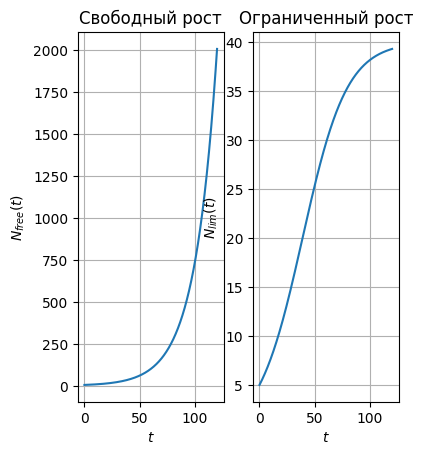

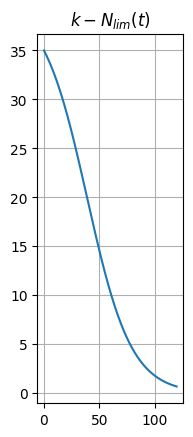

In [51]:
plt.subplot(1, 3, 1)
plt.plot(t, N_free)
plt.title("Свободный рост")
plt.grid()
plt.xlabel("$t$")
plt.ylabel("$N_{free}(t)$")


plt.subplot(1, 3, 2)
plt.plot(t, N_limited)
plt.title("Ограниченный рост")
plt.grid()
plt.xlabel("$t$")
plt.ylabel("$N_{lim}(t)$")
plt.show()

plt.subplot(1, 3, 3)
plt.plot(t, k - N_limited)
plt.title("$k-N_{lim}(t)$")
plt.grid()
# plt.xlabel("$t$")
# plt.ylabel("$N_{lim}(t)$")
plt.show()

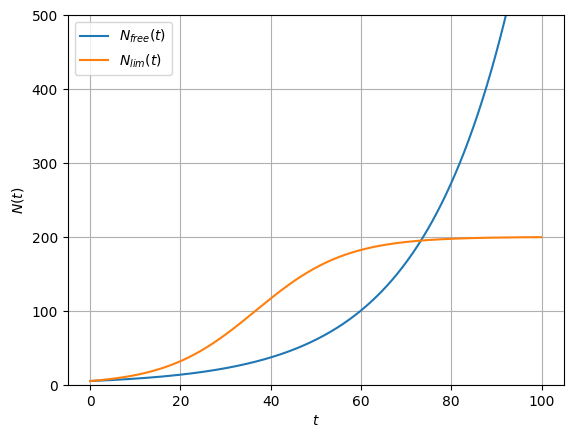

In [24]:
k = 200 # емкость среды
r = .05 # относительный темп прироста
r_lim = 0.1
t_0 = 0
N_0 = 5
t = np.arange(0, 100, 0.1)

N_free = N_0 * np.exp(r * (t - t_0))
N_limited = k * N_0 * np.exp(r_lim * (t - t_0)) / (k + N_0 * (np.exp(r_lim * (t - t_0)) - 1))

plt.plot(t, N_free, label="$N_{free}(t)$")
plt.plot(t, N_limited, label="$N_{lim}(t)$")
plt.ylim([0, 500])
plt.grid()
plt.xlabel("$t$")
plt.ylabel("$N(t)$")
plt.legend()


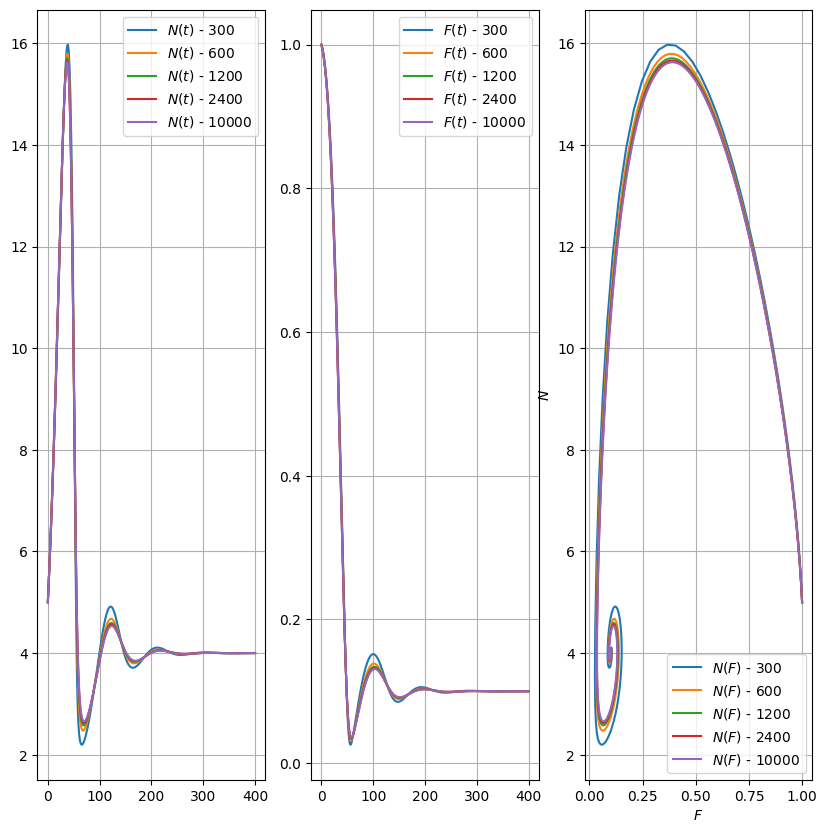

In [48]:
r = .05
N_0 = 5
k = 40
C = .01
b = 2.5e-3
F_0 = 1



N_lam = lambda t, N, F: r * N * (1 - N / k / F)
F_lam = lambda t, N: C - b * N

max_point_counts = [300, 600, 1200, 2400, 10000]
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

for mp in max_point_counts:

  N = [N_0]
  F = [F_0]
  t = np.linspace(0, 400, mp)
  h = t[1] - t[0]
  for i in range(1, len(t)):
    N.append(N[i-1] + h * N_lam(t[i - 1], N[i - 1], F[i - 1]))
    F.append(F[i-1] + h * F_lam(t[i - 1], N[i - 1]))
  # plt.figure(figsize=(10, 10))

  # plt.subplot(1, 3, 1)
  ax[0].plot(t, N, label=f"$N(t)$ - {mp}")
  ax[0].legend()
  ax[0].grid()

  # plt.subplot(1, 3, 2)
  ax[1].plot(t, F, label=f"$F(t)$ - {mp}")
  ax[1].legend()
  ax[1].grid()

  # ax[2].subplot(1, 3, 3)
  ax[2].plot(F, N, label=f"$N(F)$ - {mp}")
  ax[2].set_xlabel("$F$")
  ax[2].set_ylabel("$N$")

  ax[2].legend()
  ax[2].grid()